In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
ppo_data = np.load('eval_results/ppo/evaluations.npz')
a2c_data = np.load('eval_results/a2c/evaluations.npz')
dqn_data = np.load('eval_results/dqn/evaluations.npz')

In [5]:
ppo_df = pd.read_csv('test_logs/ppo.csv')
a2c_df = pd.read_csv('test_logs/a2c.csv')
dqn_df = pd.read_csv('test_logs/dqn.csv')
greedy_df = pd.read_csv('test_logs/greedy.csv')
random_df = pd.read_csv('test_logs/random.csv')

In [14]:
ppo_df["reward"] = ppo_df['travel_reward'] + ppo_df['ride_reward']
a2c_df["reward"] = a2c_df['travel_reward'] + a2c_df['ride_reward']
dqn_df["reward"] = dqn_df['travel_reward'] + dqn_df['ride_reward']
random_df["reward"] = random_df['travel_reward'] + random_df['ride_reward']
greedy_df["reward"] = greedy_df['travel_reward'] + greedy_df['ride_reward']

In [7]:
random_avg = random_df.groupby('current_date')['reward'].sum().mean()
greedy_avg = greedy_df.groupby('current_date')['reward'].sum().mean()

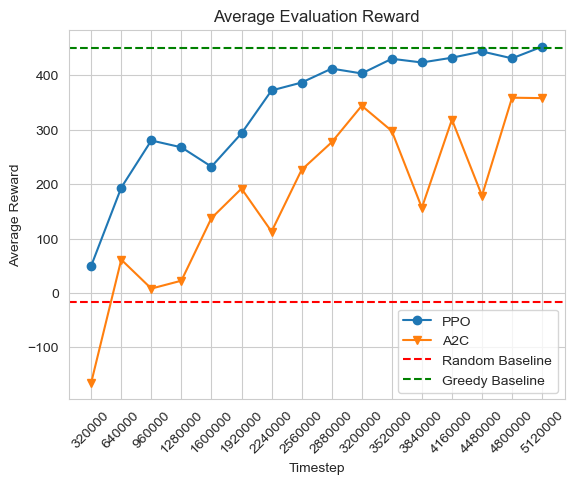

In [8]:
sns.set_style("whitegrid")

plt.ticklabel_format(useOffset=False)
plt.plot(ppo_data["timesteps"], ppo_data["results"].mean(axis=1), label="PPO", marker='o')
plt.plot(a2c_data["timesteps"], a2c_data["results"].mean(axis=1), label="A2C", marker='v')
plt.xticks(ppo_data["timesteps"], labels=ppo_data["timesteps"], rotation=45)

# draw random and greedy baselines
plt.axhline(y=random_avg, color='r', linestyle='--', label="Random Baseline")
plt.axhline(y=greedy_avg, color='g', linestyle='--', label="Greedy Baseline")

plt.xlabel("Timestep")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Average Evaluation Reward")
plt.show()

In [11]:
ppo_train_df = pd.read_csv('monitor_logs/ppo/train.monitor.csv', skiprows=1)
a2c_train_df = pd.read_csv('monitor_logs/a2c/train.monitor.csv', skiprows=1)
dqn_train_df = pd.read_csv('monitor_logs/dqn/train.monitor.csv', skiprows=1)

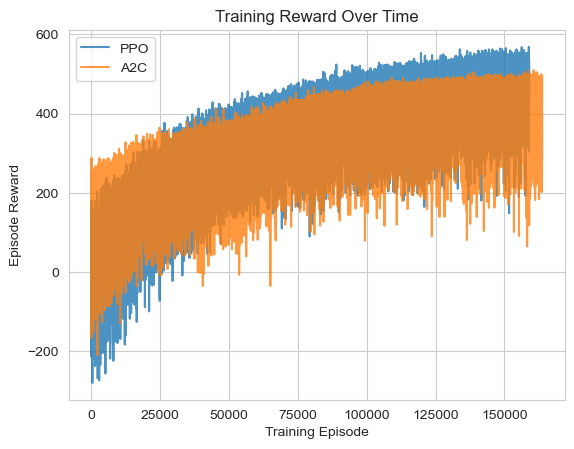

In [12]:
plt.plot(ppo_train_df["r"], label="PPO", alpha=0.8)
plt.plot(a2c_train_df["r"], label="A2C", alpha=0.8)
plt.legend()
plt.xlabel("Training Episode")
plt.ylabel("Episode Reward")
plt.title("Training Reward Over Time")
plt.show()